## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams.

Fair warning: Some of these scam e-mails have offensive content. If you start reading the e-mail text or the token data, you might read something offensive. If that's a problem, feel free to e-mail me, and we can talk about it and discuss how to proceed with alternative tasks.

### Q1.

**Tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [5]:
import pickle #Ran the below code chunk to open it
with open("all_tokens.pickle", "rb") as file:
    all_tokens = pickle.load(file)

In [6]:
from collections import Counter #Used the Counter class to look at the most common words
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

In [7]:
token_count

Counter({'1100': 6,
         'disc': 30,
         'uniformitarianism': 4,
         '1086': 2,
         'sex': 150,
         'lang': 28,
         'dick': 21,
         'hudson': 4,
         'observations': 4,
         'use': 389,
         'side': 31,
         'galicismos': 1,
         'galicismo': 1,
         'spanish': 85,
         'term': 115,
         'names': 78,
         'improper': 2,
         'introduction': 22,
         'french': 97,
         'words': 95,
         'sounding': 6,
         'thus': 11,
         'deceptive': 1,
         'equistar': 22,
         'deal': 324,
         'tickets': 41,
         'still': 178,
         'available': 373,
         'assist': 16,
         'robert': 82,
         'entering': 15,
         'new': 1365,
         'talking': 58,
         'bryan': 18,
         'hull': 3,
         'anita': 21,
         'luong': 1,
         'kyle': 2,
         'hello': 501,
         'hot': 110,
         'lil': 8,
         'horny': 17,
         'toy.': 7,
         'one': 

In [8]:
token_freq

[('new', 1365),
 ('date', 1202),
 ('get', 1052),
 ('please', 1022),
 ('enron', 927),
 ('like', 923),
 ('2002', 869),
 ('would', 806),
 ('one', 798),
 ('message', 795),
 ('call', 740),
 ('free', 691),
 ('software', 680),
 ('dear', 651),
 ('know', 644),
 ('email', 629),
 ('url:', 625),
 ('time', 609),
 ('start', 604),
 ('linguistics', 598),
 ('online', 591),
 ('need', 587),
 ('wrote:', 585),
 ('see', 554),
 ('conference', 553),
 ('language', 550),
 ('want', 548),
 ('empty', 546),
 ('hourahead', 526),
 ('list', 523),
 ('attached', 515),
 ('hello', 501),
 ('university', 500),
 ('2001', 489),
 ('information', 473),
 ('vince', 473),
 ('may', 461),
 ('good', 449),
 ('following', 448),
 ('hour', 446),
 ('2000', 442),
 ('business', 442),
 ('save', 423),
 ('first', 423),
 ('click', 423),
 ('best', 423),
 ('make', 421),
 ('com', 413),
 ('original', 410),
 ('offer', 405),
 ('meeting', 403),
 ('thanks', 397),
 ('mail', 395),
 ('use', 389),
 ('find', 386),
 ('papers', 383),
 ('http', 378),
 ('sent',

Plot a histogram of the occurrences of tokens.

What do you notice about the frequency of occurrence of different tokens? How does it look?

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

token_freq_df = pd.DataFrame(token_count.items(), columns=["token", "count"]) #Convert token frequency to a dataframe

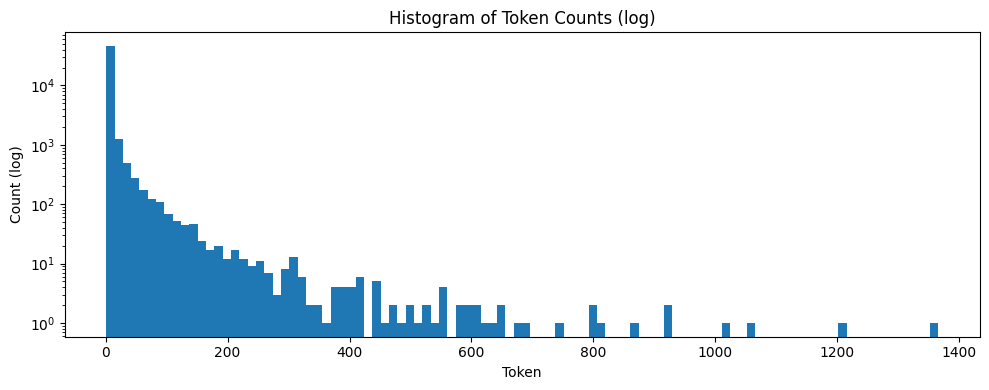

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

token_freq_df = pd.DataFrame(token_count.items(), columns=["token", "count"]) #Convert token frequency to a dataframe

plt.figure(figsize = (10,4)) #Generate histogram of token frequency on a log scale
plt.hist(token_freq_df["count"], bins = 100)
plt.yscale("log")
plt.xlabel("Token")
plt.ylabel("Count (log)")
plt.title("Histogram of Token Counts (log)")
plt.tight_layout()
plt.show()

Overall, this logarithmic histogram has an extremely right skew, with higher counts happening at lower token occurrences. For example, I noticed that there is a large number of low-occurrence tokens, showing that token occurrences are not very frequent. However, as you increase the number of token occurrences, you will notice a lower count. This leads to a really long, large tail towards the right end of the histogram. Overall, the shape of the histogram starts at a peak at a token occurrence of 0 and steadily decreases as you increase the number of token occurrences.

### Q2.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [10]:
import pandas as pd
phishing_df = pd.read_parquet("Phishing_clean.parquet")

2.1

In [12]:
from sklearn.model_selection import train_test_split

X = phishing_df.drop(columns = ["Email Type"])   #all predictor variables
y = phishing_df["Email Type"]                   #target variable

X_train, X_test, y_train, y_test = train_test_split( #Perform 80/20 train-test split
    X, y, test_size = 0.2, random_state = 42
)

print("Training set size:", X_train.shape) #Printed the shape of the training and testing set
print("Testing set size:", X_test.shape)

Training set size: (14907, 2711)
Testing set size: (3727, 2711)


2.2

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression() #Fit regression
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train) #Predict on training set
y_test_pred = model.predict(X_test)   #Predict on testing set

y_train_pred_reshaped = y_train_pred.reshape(-1, 1) #Reshape predicted values to be 2-dimensional
y_test_pred_reshaped = y_test_pred.reshape(-1, 1)

r2_train = model.score(X_train, y_train) #Compute R² on training set
r2_test = model.score(X_test, y_test) #Compute R² on testing set

print("R² (training):", r2_train)
print("R² (test):", r2_test)

R² (training): 0.7670143724934355
R² (test): 0.6658718438847919


2.3

In [14]:
import numpy as np
import pandas as pd

X = phishing_df.drop(columns = ["Email Type"])  #All predictor variables #Define X here as it was not executed in the current runtime

feature_names = X.columns #Get feature names

coefs = model.coef_ #Get the fitted coefficients

coef_df = pd.DataFrame({ #Combine into a DataFrame
    "word": feature_names,
    "coefficient": coefs,
    "abs_value": np.abs(coefs)
})

coef_df = coef_df.sort_values(by = "abs_value", ascending = False) #Sort by absolute value of coefficient

print(coef_df.head(10)) #Show the top influential words

                   word  coefficient  abs_value
835        intervention    -1.259257   1.259257
740           localized     0.824350   0.824350
2362            thermal     0.747006   0.747006
851             crawler     0.696167   0.696167
1504  background-image:    -0.622909   0.622909
1406         helvetica,     0.598560   0.598560
906               aging     0.594956   0.594956
1839              form.     0.576886   0.576886
2242              gray;    -0.574480   0.574480
1552           a:active     0.574480   0.574480


The words with the largest positive coefficients in absolute value include "intervention", "localized", "thermal", "crawler", "background-image:", "helvetica", "aging", "form.", "gray;", and "a:active", which is in descending order. "Intervention" has the highest positive coefficient in absolute value of all the most influential words. Thus, these words most strongly influence the model's predictions.

### Q3.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components = 2) #Split PCA into 2 components
X_pca = pca.fit_transform(X)

PCA_df = pd.DataFrame(X_pca, columns = ["PC1", "PC2"]) #Make a dataframe for the 2 PCA components
PCA_df["Email Type"] = y.reset_index(drop = True)

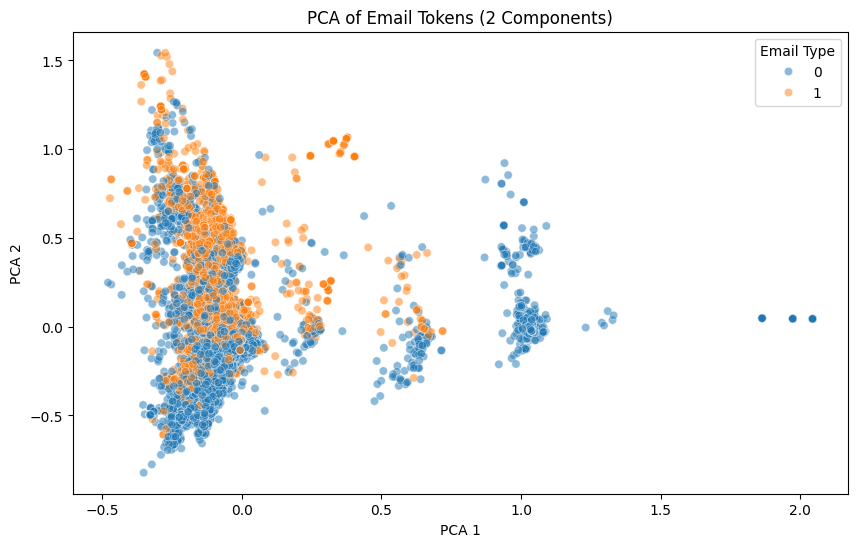

Explained variance ratio by PCA 1: 0.0111
Explained variance ratio by PCA 2: 0.0086
Total explained variance by first 2 components: 0.0197


In [16]:
plt.figure(figsize = (10, 6)) #Plots of the first two principal components
sns.scatterplot(x = "PC1", y = "PC2", hue = "Email Type", data = PCA_df, alpha = 0.5)
plt.title("PCA of Email Tokens (2 Components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

#Email Type 0: non-scam
#Email Type 1: scam

print(f"Explained variance ratio by PCA 1: {pca.explained_variance_ratio_[0]:.4f}") #Print explained variance ratio
print(f"Explained variance ratio by PCA 2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total explained variance by first 2 components: {pca.explained_variance_ratio_.sum():.4f}")

The blue points (Email Type: non-scam) and the orange points (Email Type: scam) show quite a lot of overlap in this PCA scatterplot, indicating that there is not a lot of separation between the 2 class components. So, this means there is not a lot of strong discrimination or discreteness between the class information. There are some outliers to the far right of the scatterplot, which might represent emails with some abnormal or unique usage of email tokens. I also noticed that there are large clusters in the histogram, meaning the scatterplot is trying to depict general structures or patterns in the email tokens but not specific features. Thus, this PCA is good for a quick scan of what is going on but not good at capturing specific structures.

### Q4.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [17]:
from sklearn.decomposition import PCA #Import everything
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #Perform the train/test split

pca = PCA(n_components = 2610) #Do PCA (split to components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca = LinearRegression() #Fit linear regression
lr_pca.fit(X_train_pca, y_train)

y_train_pred = lr_pca.predict(X_train_pca) #Conduct predictions
y_test_pred = lr_pca.predict(X_test_pca)

r2_train = r2_score(y_train, y_train_pred) #Calculate R^2 values for the training and testing set
r2_test = r2_score(y_test, y_test_pred)

print(f"Training R²: {r2_train:.4f}") #Print values for R^2
print(f"Test R²: {r2_test:.4f}")


Training R²: 0.7662
Test R²: 0.6683


The training R^2 value I got for this question was 0.7662. The testing R^2 value I got for this question was 0.6683. The training R^2 value I got for question 2 (linear regression) was about 0.7670. The testing R^2 value I got for question 2 (linear regression) was about 0.6659. The training R^2 value is less than the training R^2 value I got for the linear regression. However, the testing R^2 value I got is greater than the testing R^2 value I got for the linear regression. This shows PCA is better at predicting for unknown/unseen data.

### Q5.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

The advantage that is provided in using the principal components to run this high-dimensional regression rather than the original data is that it produces a set of uncorrelated components that are smaller than highly dimensional, highly correlated features but still capture a lot of crucial variation. Thus, it reduces noise, prevents overfitting, and makes the computation easier. It basically is more efficient but still meaningfully retains the data.